In [5]:
test_no_of_days = 5

# Import Libraries

In [36]:
from datetime import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set_theme() # affects all matplotlib and seaborn plots
plt.style.use('ggplot')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.stattools import durbin_watson
import re

import plotly.express as px
import plotly.graph_objs as go

import plotly.io as pio
pio.templates.default = "ggplot2"
pio.renderers.default = "notebook"
# injects plotly.js into the notebook for offline plotly
# but only works for the first save, for some reason

# Read

In [7]:
input_df = pd.read_excel("dataset.xlsx", dtype={
    "Time": str,
    "Heart Rate": np.float16
})
input_df

,Time,Heart Rate
0,12:00:00,84.2500
1,13:00:00,84.2500
2,14:00:00,84.0625
3,15:00:00,85.6250
4,16:00:00,87.1875
...,...,...
1795,1900-03-15 07:00:00,103.8125
1796,1900-03-15 08:00:00,101.6250
1797,1900-03-15 09:00:00,99.5625
1798,1900-03-15 10:00:00,99.1875


# Cleanup

In [8]:
df = input_df.copy()
df["Time"] = pd.to_datetime(df["Time"]).dt.time
print(df.shape[0])

1800


In [9]:
no_of_days = df.shape[0]//24
my_range = pd.date_range(start='2022-01-01 12:00:00', freq='H', periods=no_of_days*24)
print(my_range.shape[0])

1800


In [92]:
df["Time"]=my_range
df

,Time,Heart Rate
0,2022-01-01 12:00:00,84.2500
1,2022-01-01 13:00:00,84.2500
2,2022-01-01 14:00:00,84.0625
3,2022-01-01 15:00:00,85.6250
4,2022-01-01 16:00:00,87.1875
...,...,...
1795,2022-03-17 07:00:00,103.8125
1796,2022-03-17 08:00:00,101.6250
1797,2022-03-17 09:00:00,99.5625
1798,2022-03-17 10:00:00,99.1875


# Visualization

In [91]:
fig = px.line(df, "Time", "Heart Rate", title="Heart Rate<br><sup></sup>")
fig.show(config=dict(
        displayModeBar = True,
        displaylogo = False,
        modeBarButtonsToRemove = ["zoom", "pan", "zoomIn", "zoomOut", "autoScale", "resetScale"],
        
        # scrollZoom = True,
        
        toImageButtonOptions = dict(
            format = 'svg', # one of png, svg, jpeg, webp
            filename = "Given_Data",
            width = 1000,
            height = 1000/2,
            scale = 1 # Multiply title/legend/axis/canvas sizes by this factor
        )
))

# Checking if Stationary

## Correlogram

Figure(640x480)
Figure(640x480)


C:\Users\Ahmed Thahir\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



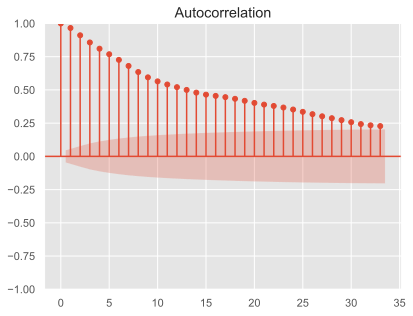

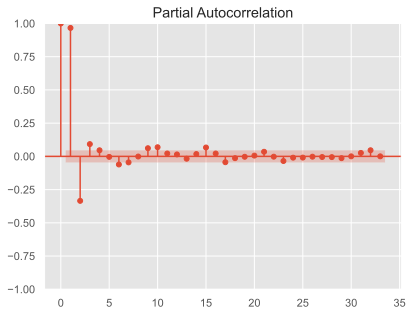

In [37]:
print(plot_acf(df["Heart Rate"]))
print(plot_pacf(df["Heart Rate"]))

## Augmented Dicky-Fuller Test

In [13]:
adf_test = adfuller(df["Heart Rate"])

p = "{0:.5f}".format(adf_test[1])
print(f'p-value: {p}')

print()

t = "{0:.5f}".format(adf_test[0])
print(f't value: {t}')
print()
print("Critical Regions")
for key, val in adf_test[4].items():
    print(
        key,
        "{0:.5f}".format(val)
    )

p-value: 0.00003

t value: -4.96788

Critical Regions
1% -3.43402
5% -2.86316
10% -2.56763


## Hence, AR(3)

In [14]:
model = ARIMA(df["Heart Rate"], order=(3,0,0))
model = model.fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Heart Rate   No. Observations:                 1800
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -3041.628
Date:                Fri, 23 Dec 2022   AIC                           6093.255
Time:                        22:27:56   BIC                           6120.733
Sample:                             0   HQIC                          6103.398
                               - 1800                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.5923      0.814    113.723      0.000      90.997      94.188
ar.L1          1.3264      0.008    161.655      0.000       1.310       1.342
ar.L2         -0.4632      0.028    -16.532      0.000      -0.518      -0.408
ar.L3          0.0973      0.027      3.627      0.000       0.045       0.150
sigma2         1.7161      0.014    119.613      0.000       1.688       1.744
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            248894.27
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                            -1.43
Prob(H) (two-sided):                  0.12   Kurtosis:                        60.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## AR(3) model is preferred

Figure(640x480)
Figure(640x480)


C:\Users\Ahmed Thahir\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



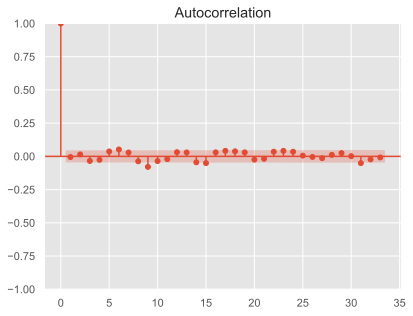

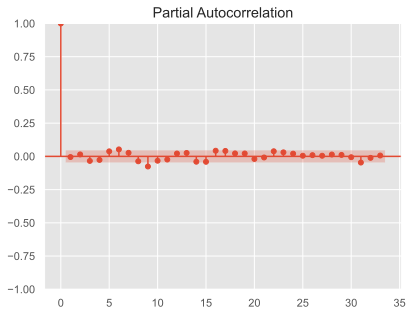

In [15]:
residuals = model.resid[1:]
print(plot_acf(residuals))
print(plot_pacf(residuals))

# Model

In [16]:
test_length = test_no_of_days * 24
outsample_train_no_of_days = 5

In [17]:
test_start = df["Time"].iloc[-test_length]
test_end = df["Time"].iloc[-1]
test_start_string = datetime.strftime(test_start, "%b %d %Y")
test_end_string = datetime.strftime(test_end, "%b %d %Y")

# In-Sample

In [18]:
insample_df = df.rename(columns={
    "Heart Rate": "True Heart Rate"
})

In [19]:
def insample(insample_df, ar, i, ma):
    model = ARIMA(insample_df["True Heart Rate"], order=(ar,i,ma))
    model = model.fit()

    pred = model.predict(start=1)
    
    insample_df[f"Insample Prediction Heart Rate ARIMA({ar},{i},{ma})"] = pred
    insample_df[f"Insample Error Heart Rate ARIMA({ar},{i},{ma})"] = np.subtract(pred, insample_df["True Heart Rate"])

insample(insample_df, 3, 0, 0)
insample(insample_df, 1, 0, 0)

$s_t = \beta_0 + \beta_1 s_{t-1} + \beta_2 s_{t-2} + \beta_2 s_{t-3} + u_t$

In [20]:
insample_df

,Time,True Heart Rate,"Insample Prediction Heart Rate ARIMA(3,0,0)","Insample Error Heart Rate ARIMA(3,0,0)","Insample Prediction Heart Rate ARIMA(1,0,0)","Insample Error Heart Rate ARIMA(1,0,0)"
0,2022-01-01 12:00:00,84.2500,NaN,NaN,NaN,NaN
1,2022-01-01 13:00:00,84.2500,84.523145,0.273145,84.521518,0.271518
2,2022-01-01 14:00:00,84.0625,84.615291,0.552791,84.521518,0.459018
3,2022-01-01 15:00:00,85.6250,84.331060,-1.293940,84.340123,-1.284877
4,2022-01-01 16:00:00,87.1875,86.490375,-0.697125,85.851753,-1.335747
...,...,...,...,...,...,...
1795,2022-03-17 07:00:00,103.8125,103.899224,0.086724,104.051781,0.239281
1796,2022-03-17 08:00:00,101.6250,103.152455,1.527455,103.447129,1.822129
1797,2022-03-17 09:00:00,99.5625,100.528332,0.965832,101.330846,1.768346
1798,2022-03-17 10:00:00,99.1875,98.745095,-0.442405,99.335495,0.147995


# Out of Sample

In [21]:
outsample_df = df.rename(columns={
    "Heart Rate": "True Heart Rate"
})
outsample_test = outsample_df[-test_length:]

In [22]:
def outsample(outsample_df, outsample_test, ar, i, ma):
    forecasts = []
    for test_start in outsample_test["Time"]:
        train_start = test_start - pd.Timedelta(days=outsample_train_no_of_days)
#         print(train_start)
        
        train = outsample_df.loc[
            (outsample_df["Time"] >= train_start) & (outsample_df["Time"] < test_start),
            :
        ].reset_index()
        
        model = ARIMA(train["True Heart Rate"], order=(ar,i,ma))
        model = model.fit()
        forecasts.append(model.forecast().iloc[0])
        
        
    pred = np.array(forecasts)
    outsample_test.loc[:,f"Outsample Prediction Heart Rate ARIMA({ar},{i},{ma})"] = pred
    outsample_test.loc[:,f"Outsample Error Heart Rate ARIMA({ar},{i},{ma})"] = np.subtract(pred, outsample_test["True Heart Rate"])
    
outsample(outsample_df, outsample_test, 3, 0, 0)
outsample(outsample_df, outsample_test, 1, 0, 0)

C:\Users\Ahmed Thahir\AppData\Local\Temp\ipykernel_10728\1041193550.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ahmed Thahir\AppData\Local\Temp\ipykernel_10728\1041193550.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ahmed Thahir\AppData\Local\Temp\ipykernel_10728\1041193550.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

# Visualization

In [23]:
summary = (
    insample_df
    .merge(outsample_test, on="Time", how="left", suffixes=('', '_y'))
).drop("True Heart Rate_y", axis=1)
summary

,Time,True Heart Rate,"Insample Prediction Heart Rate ARIMA(3,0,0)","Insample Error Heart Rate ARIMA(3,0,0)","Insample Prediction Heart Rate ARIMA(1,0,0)","Insample Error Heart Rate ARIMA(1,0,0)","Outsample Prediction Heart Rate ARIMA(3,0,0)","Outsample Error Heart Rate ARIMA(3,0,0)","Outsample Prediction Heart Rate ARIMA(1,0,0)","Outsample Error Heart Rate ARIMA(1,0,0)"
0,2022-01-01 12:00:00,84.2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 13:00:00,84.2500,84.523145,0.273145,84.521518,0.271518,NaN,NaN,NaN,NaN
2,2022-01-01 14:00:00,84.0625,84.615291,0.552791,84.521518,0.459018,NaN,NaN,NaN,NaN
3,2022-01-01 15:00:00,85.6250,84.331060,-1.293940,84.340123,-1.284877,NaN,NaN,NaN,NaN
4,2022-01-01 16:00:00,87.1875,86.490375,-0.697125,85.851753,-1.335747,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1795,2022-03-17 07:00:00,103.8125,103.899224,0.086724,104.051781,0.239281,104.092813,0.280313,104.155848,0.343348
1796,2022-03-17 08:00:00,101.6250,103.152455,1.527455,103.447129,1.822129,103.430751,1.805751,103.541577,1.916577
1797,2022-03-17 09:00:00,99.5625,100.528332,0.965832,101.330846,1.768346,101.068453,1.505953,101.378527,1.816027
1798,2022-03-17 10:00:00,99.1875,98.745095,-0.442405,99.335495,0.147995,99.118650,-0.068850,99.349054,0.161554


# Plot

In [85]:
def my_plot(df, to_plot):

    if(to_plot=="Prediction"):
        columns = df.columns[
            df.columns.str.contains("True")|
            df.columns.str.contains(to_plot)
        ]
    else:
        columns = df.columns[
            df.columns.str.contains(to_plot)
        ]
    
    
    
    
    fig = go.Figure().update_layout(
      margin=dict(t=80, r=0, b=0, l=0),

      # Title and Subtitle
      title = dict(
        text =
            f'Heart Rate {to_plot}' + "<br><sup>" +
            f"{test_start_string} ↔ {test_end_string}</sup>",
        x = 0,
        y = 0.95
      ),

      # axes titles
      xaxis_title = "Time",
      yaxis_title = f"Heart Rate {to_plot}",

      hovermode = "x unified",

      # legend
      showlegend = True,
      legend = dict(
        groupclick="toggleitem",
        orientation = 'h',

        # positioning
        x = 0.5,
        xanchor = "left",

        y = 1,
        yanchor = "bottom",

        font = dict(
              size = 10
            ),
        itemsizing = 'constant',

        # click behavior
        #itemclick = 'toggleothers',
        #itemdoubleclick = 'toggle'
      )
    )
    
    if(to_plot=="Prediction"):
        fig.update_yaxes(
            range=[0, 1.1 * df[columns].max().max()]
        )
    else:
        fig.update_yaxes(
            range=[df[columns].min().min(), 1.1 * df[columns].max().max()]
        )
#     .update_xaxes(
#         range=[test_start - pd.Timedelta(days=0.25*test_no_of_days), test_end]
#     )

    for column in columns:
        text = column.split("Heart Rate")
        name = text[-1].strip()
        legend = text[0].strip()

        trace = go.Scattergl(
            x = df["Time"].values,
            y = df[column].values,
            name = name,
            legendgroup = legend,
            legendgrouptitle_text = legend
        )

        if(legend=="True"):
            trace.line.update(dash="dot")

        fig.add_trace(trace)

    
    fig.show(config=dict(
        displayModeBar = True,
        displaylogo = False,
        modeBarButtonsToRemove = ["zoom", "pan", "zoomIn", "zoomOut", "autoScale", "resetScale"],
        
        # scrollZoom = True,
        
        toImageButtonOptions = dict(
            format = 'svg', # one of png, svg, jpeg, webp
            filename = to_plot,
            width = 1000,
            height = 1000/2,
            scale = 1 # Multiply title/legend/axis/canvas sizes by this factor
        )
    ))

In [86]:
my_plot(summary, "Prediction")

# Errors

In [87]:
my_plot(summary, "Error")

# RMSE

In [88]:
models = summary.columns[
    summary.columns.str.contains("Prediction")
]

errors = []
for model in models:
    temp = summary[["True Heart Rate", model]].dropna()
    mse = mean_squared_error(
        temp[model], temp["True Heart Rate"].dropna(),
        squared=False
    )
    r2 = r2_score(
        temp[model], temp["True Heart Rate"].dropna()
    )
    
    if("Insample" in model):
        n = summary.shape[0]
    else:
        n = outsample_train_no_of_days * 24
    
    k = 0
    for number in re.findall("\d+", model):
        k += int(number)
    
    adj_r2= 1-(1-r2)*(n-1)/(n-k-1)
    
    errors.append([model, adj_r2, mse])
    
errors_df = pd.DataFrame(
    errors,
    columns = ["Model", "Adjusted R2", "RMSE"]
).sort_values(
    ["Adjusted R2", "RMSE"],
    ascending = [False, True]
)
errors_df

,Model,Adjusted R2,RMSE
0,"Insample Prediction Heart Rate ARIMA(3,0,0)",0.939552,1.309519
3,"Outsample Prediction Heart Rate ARIMA(1,0,0)",0.936579,2.081938
2,"Outsample Prediction Heart Rate ARIMA(3,0,0)",0.935641,2.081262
1,"Insample Prediction Heart Rate ARIMA(1,0,0)",0.930654,1.397753


In [89]:
model_errors = summary.columns[
    summary.columns.str.contains("Error")
]

errors = []
for model_error in model_errors:
    temp = summary[["True Heart Rate", model_error]].dropna()
    
    adf_test = adfuller(temp[model_error])

    p = np.round(adf_test[1], 2)
    t = np.round(adf_test[0], 2)

    errors.append([model_error, p, t])

errors_df = pd.DataFrame(
    errors,
    columns = ["Model", "p value", "t value"]
).sort_values(
    ["p value", "t value"],
    ascending = [True, True]
)

errors_df

,Model,p value,t value
1,"Insample Error Heart Rate ARIMA(1,0,0)",0.0,-12.07
0,"Insample Error Heart Rate ARIMA(3,0,0)",0.0,-10.39
2,"Outsample Error Heart Rate ARIMA(3,0,0)",0.0,-9.61
3,"Outsample Error Heart Rate ARIMA(1,0,0)",0.0,-8.35
